#   Exploring the bulldozer data set

Let's explore another Kaggle data set [Blue Book for Bulldozers](https://www.kaggle.com/c/bluebook-for-bulldozers/data). This one is more challenging because it has lots of missing values and there are more opportunities to extract information  and cleanup various columns. There are 53 columns!

## Loading this big data set

Download `Train.zip` and unzip it into your `data` directory. For example, mine looks like:

In [1]:
!ls -l data

total 365312
-rw-r--r--@ 1 parrt  staff  116403970 Jan 24  2013 Train.csv
-rw-r--r--@ 1 parrt  staff       5996 Aug 15 11:49 cars.csv
-rw-r--r--+ 1 parrt  staff      21963 Aug 15 15:35 kaggle-uber-other-federal.csv
-rw-r--r--@ 1 parrt  staff      35959 Aug 15 10:32 organdonation.csv
-rw-r--r--@ 1 parrt  staff   70562621 Nov  1  2016 train.json


Notice that the `Train.csv` is significant bigger than the rent data set. In fact, we can ask how many lines there are in the CSV:

In [2]:
! wc -l data/*.csv

  401126 data/Train.csv
     392 data/cars.csv
     100 data/kaggle-uber-other-federal.csv
     239 data/organdonation.csv
  401857 total


There are 401,125 records not including the header row. How do I know there is a header row? We can simply ask for the first row the file:

In [3]:
! head -1 data/Train.csv

SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls


There is a data directory file also at Kaggle that explains those columns briefly. For now, let's just jump in and load the file:

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#%config InlineBackend.figure_format = 'svg'   # svg vs png format make sharper images!
%config InlineBackend.figure_format = 'retina' # much faster than svg when generating lots of points

In [5]:
df_bull = pd.read_csv('data/Train.csv', parse_dates=['saledate'])

/Users/parrt/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (13,39,40,41) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Uh oh. It looks like some of the columns have elements with different types: 13,39,40,41. Let's look at those column names:

In [6]:
df_bull.columns[[13,39,40,41]]

Index(['fiModelSeries', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow'], dtype='object')

In [7]:
for col in df_bull.columns[[13,39,40,41]]:
    print(df_bull[col].unique()[0:10])

[nan 'II' '-6E' 'LC' '-5' 'III' '-1' '5' '-2' '1']
[nan 'None or Unspecified' 'Yes']
[nan 'None or Unspecified' 'Yes']
[nan 'Standard' 'High Flow' 'None or Unspecified']


Let's tell pandas that those columns are strings by creating a dictionary that maps those column names to the `str` type name:

In [8]:
dtypes = {col:str for col in ['fiModelSeries', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow']}
dtypes

{'fiModelSeries': str,
 'Coupler_System': str,
 'Grouser_Tracks': str,
 'Hydraulics_Flow': str}

And now we can reload using `dtype` argument:

In [9]:
df_bull = pd.read_csv('data/Train.csv', dtype=dtypes, parse_dates=['saledate'])
df_bull = df_bull.sort_values('saledate') # let's order them by sale date
df_bull.head(2)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
92803,1404019,24000,1169900,7110,132,99.0,1986,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_bull = df_bull.set_index('SalesID')    # drop the default index and set to SalesID
df_bull.head(2)                           # Note, not reordered, just reindexed

,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
SalesID,,,,,,,,,,,,,,,,,,,,,
1646770,9500,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,TD20,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
1404019,24000,1169900,7110,132,99.0,1986,NaN,NaN,1989-01-31,416,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Initial sniff

As usual, we need to identify the datatypes for the columns, at least as guest by pandas:

In [11]:
df_bull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401125 entries, 1646770 to 6312170
Data columns (total 52 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalePrice                 401125 non-null  int64         
 1   MachineID                 401125 non-null  int64         
 2   ModelID                   401125 non-null  int64         
 3   datasource                401125 non-null  int64         
 4   auctioneerID              380989 non-null  float64       
 5   YearMade                  401125 non-null  int64         
 6   MachineHoursCurrentMeter  142765 non-null  float64       
 7   UsageBand                 69639 non-null   object        
 8   saledate                  401125 non-null  datetime64[ns]
 9   fiModelDesc               401125 non-null  object        
 10  fiBaseModel               401125 non-null  object        
 11  fiSecondaryDesc           263934 non-null  object        


Next, how much data is missing from the data set (keeping in mind that there might be some sentinel values in there that mean *missing*  but are physically there)?

In [12]:
df_bull.isnull().sum() / len(df_bull) * 100 # show percent missing

SalePrice                    0.000000
MachineID                    0.000000
ModelID                      0.000000
datasource                   0.000000
auctioneerID                 5.019882
YearMade                     0.000000
MachineHoursCurrentMeter    64.408850
UsageBand                   82.639078
saledate                     0.000000
fiModelDesc                  0.000000
fiBaseModel                  0.000000
fiSecondaryDesc             34.201558
fiModelSeries               85.812901
fiModelDescriptor           82.070676
ProductSize                 52.545964
fiProductClassDesc           0.000000
state                        0.000000
ProductGroup                 0.000000
ProductGroupDesc             0.000000
Drive_System                73.982923
Enclosure                    0.081022
Forks                       52.115425
Pad_Type                    80.271985
Ride_Control                62.952696
Stick                       80.271985
Transmission                54.320972
Turbocharged

Wow.  Some of those columns are almost completely missing values! For example, `Enclosure_Type` is about 94% missing.  Some of the obvious, physically present but still missing, sentinel values are strings like `None or Unspecified`.  For example:

In [13]:
df_bull.iloc[0][['Ripper','Backhoe_Mounting','Travel_Controls']]

Ripper              None or Unspecified
Backhoe_Mounting    None or Unspecified
Travel_Controls     None or Unspecified
Name: 1646770, dtype: object

Columns such as `SalesID` and `ModelID` are represented as integers (int64), but they are really nominal categorical variables. Model 8434 is not somehow greater than model 8433.

There are also columns represented as strings that contain numeric values, such as `Hydraulics` (“2 Valve”). Other columns are represented as strings but are actually purely numeric but with units such as feet or inches. For example, the values in column `Tire_Size` should be converted to just the number of inches:

In [14]:
df_bull['Tire_Size'].unique()

array([nan, '14"', 'None or Unspecified', '20.5', '23.5', '26.5', '17.5',
       '29.5', '13"', '20.5"', '23.5"', '17.5"', '15.5', '15.5"', '7.0"',
       '23.1"', '10"', '10 inch'], dtype=object)

In practice, I would look through all of the unique values for each column to get an understanding of the data.

## Cleaning up

### Cleaning string variables

We are going to convert strings that represent categorical variables to actual categorical columns, but we need to normalize them first so that there is exactly one way to say missing and things are not confused by upper and lower case etc. After digging through the data set, I found a number of things we should fix. E.g., columns `fiSecondaryDesc` and `fiModelSeries` even have a value of `#NAME?`. Let's look at three columns we will convert to categoricals:

In [15]:
df = df_bull.copy()
df['auctioneerID'] = df_bull['auctioneerID'].astype('category')

In [16]:
df['ProductGroup'].unique()

array(['TTT', 'BL', 'MG', 'WL', 'TEX', 'SSL'], dtype=object)

In [17]:
df['Drive_System'].unique()

array([nan, 'Two Wheel Drive', 'No', 'Four Wheel Drive',
       'All Wheel Drive'], dtype=object)

In [18]:
df['Backhoe_Mounting'].unique()

array(['None or Unspecified', nan, 'Yes'], dtype=object)

I have encapsulated my string normalization in a nice function:

In [19]:
def df_normalize_strings(df, col):
    df[col] = df[col].str.lower()
    df[col] = df[col].fillna(np.nan) # make None -> np.nan
    df[col] = df[col].replace('none or unspecified', np.nan)
    df[col] = df[col].replace('none', np.nan)
    df[col] = df[col].replace('#name?', np.nan)
    df[col] = df[col].replace('', np.nan)

In [20]:
df_normalize_strings(df, 'ProductGroup')
df_normalize_strings(df, 'Drive_System')
df_normalize_strings(df, 'Backhoe_Mounting')
df_normalize_strings(df, 'fiSecondaryDesc')
df_normalize_strings(df, 'fiModelSeries')

Ok, getting back to the categorical variables, we can see that they are nicely normalized now:

In [21]:
df['ProductGroup'].unique()

array(['ttt', 'bl', 'mg', 'wl', 'tex', 'ssl'], dtype=object)

In [22]:
df['Drive_System'].unique()

array([nan, 'two wheel drive', 'no', 'four wheel drive',
       'all wheel drive'], dtype=object)

In [23]:
df['Backhoe_Mounting'].unique()

array([nan, 'yes'], dtype=object)

### Setting the type of categorical variables

Now that we have normalized strings, we can convert them to categorical variables:

In [24]:
df['ProductGroup'] = df['ProductGroup'].astype('category')
df['Drive_System'] = df['Drive_System'].astype('category')
df['Backhoe_Mounting'] = df['Backhoe_Mounting'].astype('category')

### Extracting numerical information from strings

Some strings are actually numeric values, but include unit names or symbols that force the dataframe to treat them as strings:

In [25]:
print(df['Tire_Size'].unique())
print(df['Undercarriage_Pad_Width'].unique())

[nan '14"' 'None or Unspecified' '20.5' '23.5' '26.5' '17.5' '29.5' '13"'
 '20.5"' '23.5"' '17.5"' '15.5' '15.5"' '7.0"' '23.1"' '10"' '10 inch']
[nan 'None or Unspecified' '24 inch' '30 inch' '28 inch' '36 inch'
 '20 inch' '31 inch' '32 inch' '22 inch' '34 inch' '27 inch' '26 inch'
 '15 inch' '16 inch' '25 inch' '18 inch' '33 inch' '14 inch' '31.5 inch']


The easiest and most concise way to extract the numerical components out of any of those strings, is with regular expression pattern matching. The regular expression were going to use is `'([0-9.]*)'` and let me pull that apart for you. The square brackets `[0-9.]` represent the set of digits and the period. The `*` suffix operator indicates "zero or more" of those characters. The `(...)` means capture what was matched by that expression. The Python code:

```
df[colname].str.extract('([0-9.]*)', expand=True)
```

Returns a column (because of `expand`) of the values extracted from `df[colname]`. Here's a handy function:

In [26]:
def extract_sizes(df, colname):
    df[colname] = df[colname].str.extract('([0-9.]*)', expand=True)
    df[colname] = df[colname].replace('', np.nan) # empty -> NaN
    df[colname] = pd.to_numeric(df[colname]) # convert to number

In [27]:
extract_sizes(df, 'Tire_Size')
extract_sizes(df, 'Undercarriage_Pad_Width')
print("Tire_Size", df['Tire_Size'].unique())
print("Undercarriage_Pad_Width", df['Undercarriage_Pad_Width'].unique())

Tire_Size [ nan 14.  20.5 23.5 26.5 17.5 29.5 13.  15.5  7.  23.1 10. ]
Undercarriage_Pad_Width [ nan 24.  30.  28.  36.  20.  31.  32.  22.  34.  27.  26.  15.  16.
 25.  18.  33.  14.  31.5]


### Cleaning up missing numerical data

There is lots of missing numerical data in this data set. How we deal with such missing data depends on our goal. If we are doing predictive modeling, we have very specific needs depending on the model.  For our purposes, we can simply replace missing values with the median of that column, just to learn some useful techniques.

The logic behind using the median is that we have to choose a number and so we might as well choose a number that's not going to skew the distribution of the data in that column. We also don't want to choose an extreme value that a model might latch onto as predictive.

Let's replace missing values in `Tire_Size` with its median. First, look at the unique values:

In [28]:
df['Tire_Size'].unique()

array([ nan, 14. , 20.5, 23.5, 26.5, 17.5, 29.5, 13. , 15.5,  7. , 23.1,
       10. ])

In [29]:
m = df['Tire_Size'].median()  # 20.5
df['Tire_Size'] = df['Tire_Size'].fillna(m)
df['Tire_Size'].unique()

array([20.5, 14. , 23.5, 26.5, 17.5, 29.5, 13. , 15.5,  7. , 23.1, 10. ])

`YearMade` also has no obvious missing values, but something more subtle is going on here.

In [30]:
df['YearMade'].isnull().any()

False

Let's look at a histogram to get an idea of the distribution:

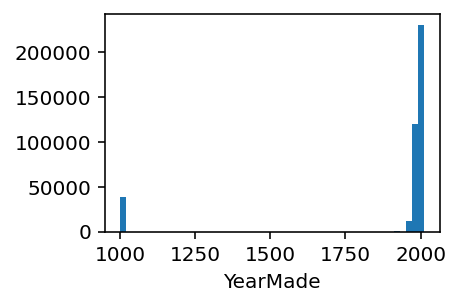

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3,2))
ax.hist(df['YearMade'], bins=50)
ax.set_xlabel("YearMade")
plt.show()

It's unlikely that humans were manufacturing bulldozers in the year 1000. Either the seller does not want to admit the age or does not know the age of the bulldozer.  

<img src="images/redbang.png" width="30" align="left"> Sometimes a missing value is actually valuable information. For example, we can see that the median price for bulldozers without the year specified, are worth significantly less than those with year specified:

In [32]:
df_yr_missing = df.loc[df['YearMade']==1000]
df_yr_ok = df.loc[df['YearMade']>1000]

df_yr_missing['SalePrice'].median(), df_yr_ok['SalePrice'].median()

(15500.0, 25000.0)

It's unclear why someone chose an indicator value of 1000 instead of 0 or -1, but we can fix this problem by replacing 1000 with the median and even going so far as to create a special column that indicates we have replaced a missing value (the technique we'll use for predictive modeling with random forests):

In [33]:
df.loc[df['YearMade']==1000, 'YearMade_na'] = pd.isnull(df['YearMade'])
df.loc[df['YearMade']==1000, 'YearMade'] = df['YearMade'].median()

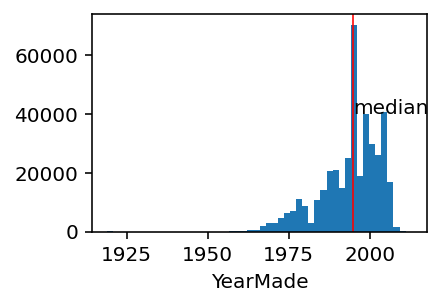

In [51]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3,2))
ax.hist(df['YearMade'], bins=50)
ax.set_xlabel("YearMade")
ax.axvline(1995, c='red', lw=.8)
ax.text(1995, 40000, "median")
plt.show()

There's one last problem with this column. Some records indicate that the bulldozer was sold before it was made:

In [36]:
# ignore the ones we flipped to be 1995, the median
df_yr_ok.query("saledate.dt.year < YearMade")[['SalePrice','YearMade','saledate']]

,SalePrice,YearMade,saledate
SalesID,,,
1766755,100000,2002,1995-08-11
1672382,12000,2008,1996-02-08
1656135,26500,1998,1996-02-21
1725834,22500,2006,1996-07-16
1256766,27000,1997,1996-12-13
1607397,72000,1998,1997-05-29
1748962,27000,2008,1997-12-15
1380049,29000,2000,1999-10-14
1662009,8500,2008,2001-10-06


## NaN can be tricky

sum of all NaN => NaN
11:28
if there is a single non-NaN value => the actual sum and NaN treated as zero. (edited) 
11:29
for count, count = count NOT NaN. 

max/min/avg

min/max of the string is alphabetical